# Aktienkursvorhersage

## Bibliotheken installieren

In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.0 KB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 11.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 KB 10.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 KB 12.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 12.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138906 sha256=b2911fff

## Daten herunterladen

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Unternehmen, die wir analysieren wollen (Symbol-Ticker für Yahoo Finance)
companies = {
    "Microsoft": "MSFT",
    "Apple": "AAPL",
    "Google": "GOOGL",
    "Amazon": "AMZN",
    "Procter & Gamble": "PG",
    "Coca-Cola": "KO",
    "Unilever": "UL",
    "Nestlé": "NSRGY",
    "ExxonMobil": "XOM",
    "Chevron": "CVX",
    "BP": "BP",
    "TotalEnergies": "TTE"
}

# Zeitraum der historischen Daten (z. B. letzten 5 Jahre)
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Leeres DataFrame zum Speichern aller Daten
all_data = pd.DataFrame()

# Herunterladen der Daten
for company, ticker in companies.items():
    print(f"Herunterladen der Daten für {company} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Spalten umbenennen für Übersichtlichkeit
    data['Company'] = company
    data['Ticker'] = ticker
    
    # Daten an das Haupt-DataFrame anhängen
    all_data = pd.concat([all_data, data])

# Überprüfen der heruntergeladenen Daten
print(all_data.head())

# Daten in einer CSV-Datei speichern, falls Sie sie später verwenden möchten
all_data.to_csv('historical_stock_data.csv')


Herunterladen der Daten für Microsoft (MSFT)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Apple (AAPL)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Google (GOOGL)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Amazon (AMZN)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Procter & Gamble (PG)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Coca-Cola (KO)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Unilever (UL)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Nestlé (NSRGY)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für ExxonMobil (XOM)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Chevron (CVX)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für BP (BP)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für TotalEnergies (TTE)...


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-01-02  86.129997  86.309998  85.500000  85.949997  79.792923  22483800   
2018-01-03  86.059998  86.510002  85.970001  86.349998  80.164291  26061400   
2018-01-04  86.589996  87.660004  86.570000  87.110001  80.869797  21912000   
2018-01-05  87.660004  88.410004  87.430000  88.190002  81.872452  23407100   
2018-01-08  88.199997  88.580002  87.599998  88.279999  81.955994  22113000   

              Company Ticker  
Date                          
2018-01-02  Microsoft   MSFT  
2018-01-03  Microsoft   MSFT  
2018-01-04  Microsoft   MSFT  
2018-01-05  Microsoft   MSFT  
2018-01-08  Microsoft   MSFT  


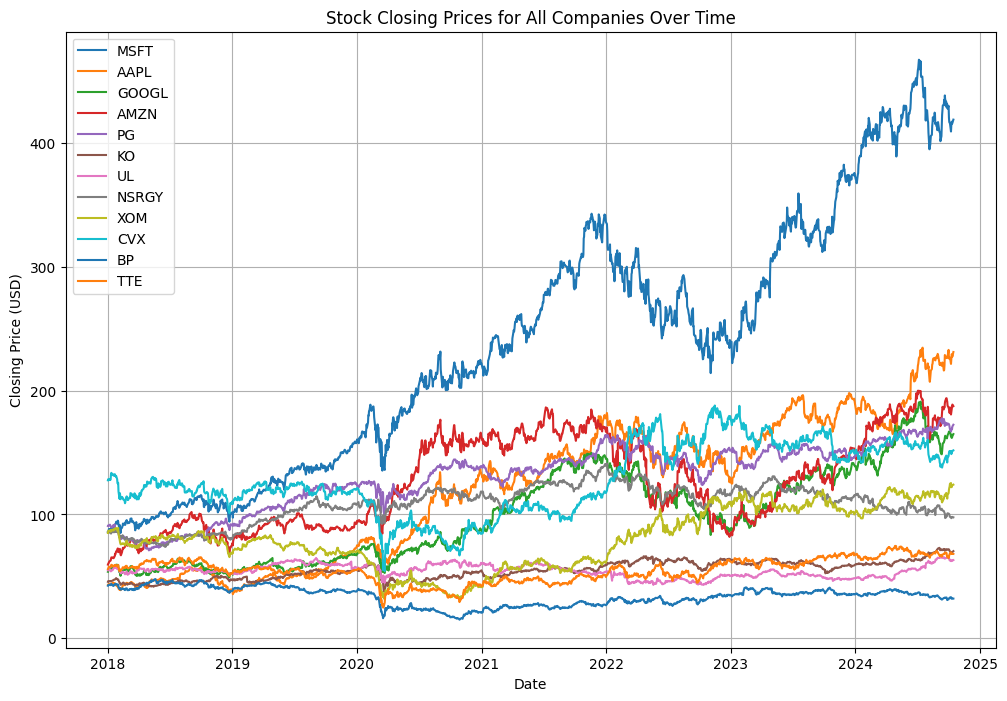

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
file_path = 'historical_stock_data.csv'  # Pfad zur CSV-Datei
data = pd.read_csv(file_path)

# Datum in ein datetime-Format umwandeln
data['Date'] = pd.to_datetime(data['Date'])

# Funktion, um die Closing-Preise aller Firmen zu plotten
def plot_all_closing_prices():
    plt.figure(figsize=(12, 8))
    
    # Liste der einzigartigen Aktien-Ticker
    tickers = data['Ticker'].unique()
    
    # Closing-Preise jeder Firma plotten
    for ticker in tickers:
        company_data = data[data['Ticker'] == ticker]
        plt.plot(company_data['Date'], company_data['Close'], label=ticker)
    
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title('Stock Closing Prices for All Companies Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot aufrufen
plot_all_closing_prices()


## Daten vorverarbeiten

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Laden der bereits heruntergeladenen Daten
data = pd.read_csv('historical_stock_data.csv', index_col=0, parse_dates=True)

# 1. Überprüfen auf fehlende Werte
missing_values = data.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)

# Fehlende Werte (falls vorhanden) entfernen oder auffüllen
# Hier füllen wir sie mit dem vorherigen Wert ("forward fill").
data.ffill(inplace=True)

# 2. Berechnung von Features: Gleitender Durchschnitt (SMA) und tägliche Preisänderung
data['SMA_20'] = data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=20).mean())
data['SMA_50'] = data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=50).mean())

# Berechnung der täglichen Preisänderung
data['Daily_Change'] = data['Close'].pct_change()

# Entfernen von Zeilen mit fehlenden Werten, die durch Berechnung der Features entstanden sind
data.dropna(inplace=True)

# 3. Skalierung der Daten
scaler = StandardScaler()

# Skalieren der Spalten: 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Daily_Change'
scaled_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Daily_Change']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Überprüfen der verarbeiteten Daten
print(data.head())

# Daten für das spätere Modell speichern
data.to_csv('prepared_stock_data.csv')


Fehlende Werte pro Spalte:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
Ticker       0
dtype: int64
                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2018-03-14 -0.125191 -0.133883 -0.136320 -0.144450  87.536255  0.185240   
2018-03-15 -0.149220 -0.146308 -0.146548 -0.139463  87.844070  0.061497   
2018-03-16 -0.131840 -0.134332 -0.129908 -0.133117  88.235817  0.649155   
2018-03-19 -0.146046 -0.156488 -0.157539 -0.158955  86.640854  0.218416   
2018-03-20 -0.156474 -0.158435 -0.143953 -0.155329  86.864723 -0.062652   

              Company Ticker    SMA_20    SMA_50  Daily_Change  
Date                                                            
2018-03-14  Microsoft   MSFT -0.142782 -0.167240     -0.358249  
2018-03-15  Microsoft   MSFT -0.140216 -0.164701      0.165228  
2018-03-16  Microsoft   MSFT -0.138738 -0.162155     

## Modellentwurf

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Laden der vorbereiteten Daten
data = pd.read_csv('prepared_stock_data.csv', index_col=0, parse_dates=True)

# Feature- und Zielspalten
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'Daily_Change']
target = 'Close'

# Daten in Feature-Matrizen (X) und Zielvektoren (y) unterteilen
X = data[features].values
y = data[target].values

# Um ein Jahr vorauszusagen, wählen wir 250 Handelstage als Eingabe und den Schlusskurs 250 Tage später als Ziel
sequence_length = 250
prediction_offset = 250  # Wir wollen den Schlusskurs 250 Tage (1 Jahr) später vorhersagen

def create_sequences(X, y, seq_length, pred_offset):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length - pred_offset):
        X_seq.append(X[i:i+seq_length])  # Eingabesequenz
        y_seq.append(y[i+seq_length+pred_offset])  # Ziel: Schlusskurs 1 Jahr später
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length, prediction_offset)

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [ ]:
# 1. Modellentwurf
model = Sequential()

# LSTM-Schicht mit Dropout
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))

# Weitere LSTM-Schicht
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Dichte Schicht für die Vorhersage
model.add(Dense(25))
model.add(Dense(1))  # Ausgabe: Vorhersage des Schlusskurses in 1 Jahr

# 2. Kompilieren des Modells
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Modelltraining
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# 4. Überprüfen der Modellleistung
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Modell speichern
model.save('stock_price_prediction_one_year_model.h5')


### Early stopping 100 Epochen

In [2]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Modellentwurf
model = Sequential()

# LSTM-Schicht mit Dropout
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))

# Weitere LSTM-Schicht
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

# Dichte Schicht für die Vorhersage
model.add(Dense(25))
model.add(Dense(1))  # Ausgabe: Vorhersage des Schlusskurses in 1 Jahr

# 2. Kompilieren des Modells
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4. Modelltraining mit mehr Epochen und Early Stopping
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 5. Überprüfen der Modellleistung
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Modell speichern
model.save('stock_price_prediction_one_year_optimized_model.h5')


C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 54s 106ms/step - loss: 0.4788 - val_loss: 0.2590
Epoch 2/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - loss: 0.2633 - val_loss: 0.2258
Epoch 3/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - loss: 0.2437 - val_loss: 0.2375
Epoch 4/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 51s 106ms/step - loss: 0.2686 - val_loss: 0.2434
Epoch 5/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - loss: 0.2356 - val_loss: 0.1954
Epoch 6/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - loss: 0.2251 - val_loss: 0.2300
Epoch 7/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 66s 137ms/step - loss: 0.2403 - val_loss: 0.2052
Epoch 8/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 82s 170ms/step - loss: 0.2605 - val_loss: 0.3859
Epoch 9/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - loss: 0.3118 - val_loss: 0.2655
Epoch 10/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 79s 164ms/step - loss: 0.2361 - val_loss: 0.2176
Epoch 11/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 57s 117ms/step - loss: 0.2227 - val_loss: 0.1861
Epoch 12

Test Loss: 0.06891997903585434


## Trainingsdaten erhöhen

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np

# Unternehmen, die wir analysieren wollen (Symbol-Ticker für Yahoo Finance)
companies = {
    "Microsoft": "MSFT",
    "Apple": "AAPL",
    "Google": "GOOGL",
    "Amazon": "AMZN",
    "Intel": "INTC",
    "Procter & Gamble": "PG",
    "Coca-Cola": "KO",
    "Unilever": "UL",
    "Nestlé": "NSRGY",
    "PepsiCo": "PEP",
    "ExxonMobil": "XOM",
    "Chevron": "CVX",
    "BP": "BP",
    "TotalEnergies": "TTE",
    "Royal Dutch Shell": "SHEL",
    "JPMorgan Chase": "JPM",
    "Bank of America": "BAC",
    "Goldman Sachs": "GS",
    "Gladstone Capital": "GLAD",
    "Citigroup": "C",
    "Wells Fargo": "WFC",
    "Pfizer": "PFE",
    "Johnson & Johnson": "JNJ",
    "Merck": "MRK",
    "AbbVie": "ABBV",
    "Novartis": "NVS",
    "General Electric": "GE",
    "Boeing": "BA",
    "Honeywell": "HON",
    "3M": "MMM",
    "Caterpillar": "CAT",
    "AT&T": "T",
    "Verizon": "VZ",
    "T-Mobile US": "TMUS",
    "Vodafone": "VOD",
    "Comcast": "CMCSA",
    "Tesla": "TSLA",
    "Ford": "F",
    "Nike": "NKE",
    "LVMH": "LVMUY",
    "Toyota": "TM"
}

# Zeitraum der historischen Daten (z. B. letzten 5 Jahre)
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Leeres DataFrame zum Speichern aller Daten
all_data = pd.DataFrame()

# Funktionen zur Berechnung der technischen Indikatoren

def calculate_bollinger_bands(df, window=20):
    """Berechnet Bollinger Bands"""
    df['SMA'] = df['Close'].rolling(window=window).mean()
    df['Bollinger_High'] = df['SMA'] + (df['Close'].rolling(window=window).std() * 2)
    df['Bollinger_Low'] = df['SMA'] - (df['Close'].rolling(window=window).std() * 2)
    return df

def calculate_rsi(df, window=14):
    """Berechnet den Relative Strength Index (RSI)"""
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

def calculate_macd(df, slow=26, fast=12, signal=9):
    """Berechnet MACD (Moving Average Convergence Divergence)"""
    df['EMA_fast'] = df['Close'].ewm(span=fast, adjust=False).mean()
    df['EMA_slow'] = df['Close'].ewm(span=slow, adjust=False).mean()
    df['MACD'] = df['EMA_fast'] - df['EMA_slow']
    df['Signal_Line'] = df['MACD'].ewm(span=signal, adjust=False).mean()
    return df

# Herunterladen der Daten
for company, ticker in companies.items():
    print(f"Herunterladen der Daten für {company} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Berechnung der zusätzlichen Features
    data = calculate_bollinger_bands(data)
    data = calculate_rsi(data)
    data = calculate_macd(data)
    
    # Spalten umbenennen für Übersichtlichkeit
    data['Company'] = company
    data['Ticker'] = ticker
    
    # Daten an das Haupt-DataFrame anhängen
    all_data = pd.concat([all_data, data])

# Daten in einer CSV-Datei speichern, falls Sie sie später verwenden möchten
all_data.to_csv('adv_historical_stock_data_with_indicators.csv')



Herunterladen der Daten für Microsoft (MSFT)...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Herunterladen der Daten für Apple (AAPL)...



[*********************100%%**********************]  1 of 1 completed

Herunterladen der Daten für Google (GOOGL)...



[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Amazon (AMZN)...
Herunterladen der Daten für Intel (INTC)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Procter & Gamble (PG)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Coca-Cola (KO)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Unilever (UL)...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Herunterladen der Daten für Nestlé (NSRGY)...


Herunterladen der Daten für PepsiCo (PEP)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für ExxonMobil (XOM)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Chevron (CVX)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für BP (BP)...


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Herunterladen der Daten für TotalEnergies (TTE)...


Herunterladen der Daten für Royal Dutch Shell (SHEL)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für JPMorgan Chase (JPM)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Bank of America (BAC)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Goldman Sachs (GS)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Gladstone Capital (GLAD)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Citigroup (C)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Wells Fargo (WFC)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Pfizer (PFE)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Johnson & Johnson (JNJ)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Merck (MRK)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für AbbVie (ABBV)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Novartis (NVS)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für General Electric (GE)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Boeing (BA)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Honeywell (HON)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für 3M (MMM)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Caterpillar (CAT)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für AT&T (T)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Verizon (VZ)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für T-Mobile US (TMUS)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Vodafone (VOD)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Comcast (CMCSA)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Tesla (TSLA)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Ford (F)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Nike (NKE)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für LVMH (LVMUY)...


[*********************100%%**********************]  1 of 1 completed


Herunterladen der Daten für Toyota (TM)...


[*********************100%%**********************]  1 of 1 completed


C:\Users\bzenz\AppData\Local\Temp\ipykernel_7464\1559535200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_data['Date'] = pd.to_datetime(company_data['Date'])


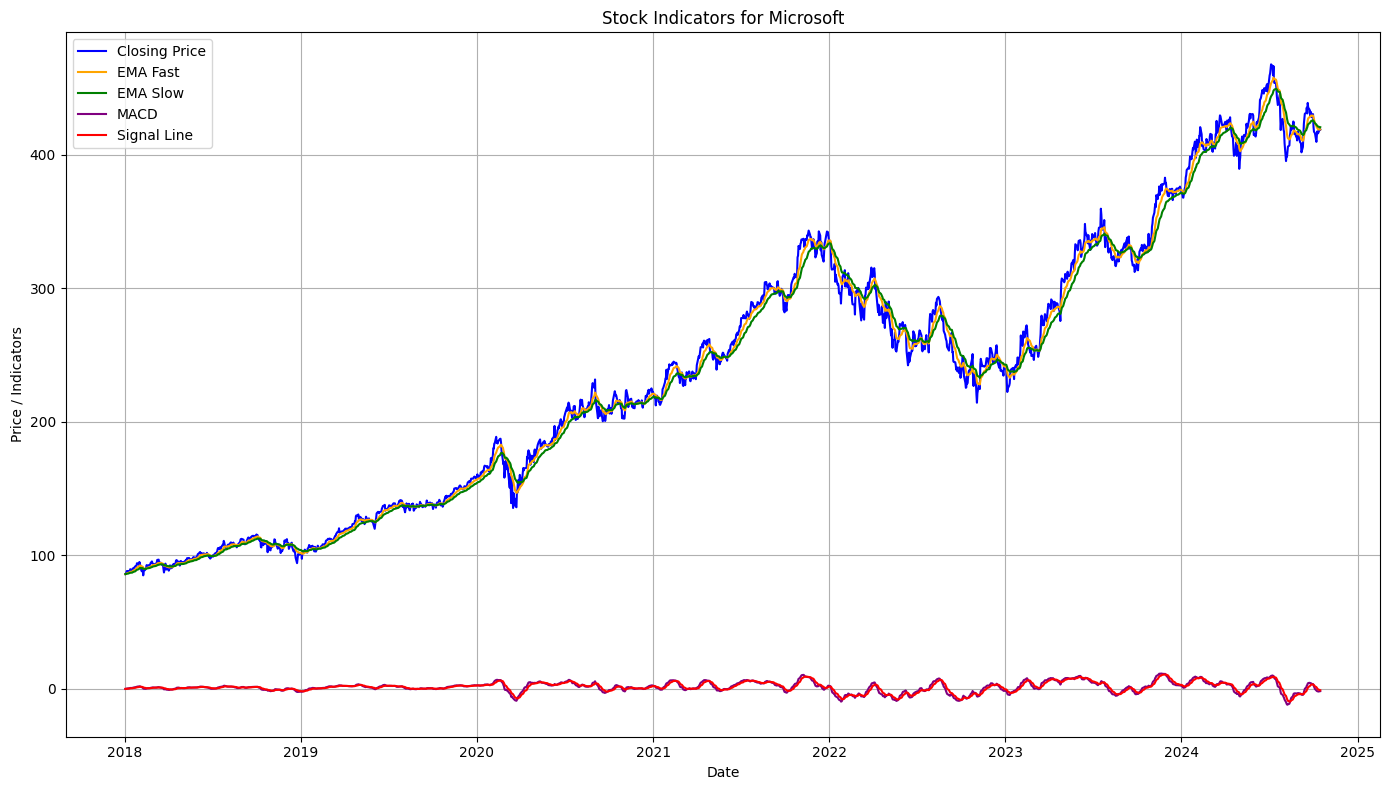

In [3]:
import matplotlib.pyplot as plt

# Filter data for a specific company (e.g., Microsoft)
company_data = data[data['Company'] == 'Microsoft']

# Convert Date column to datetime
company_data['Date'] = pd.to_datetime(company_data['Date'])

# Plotting Closing Price, EMA, and MACD in one plot

plt.figure(figsize=(14, 8))

# Plot Closing Price
plt.plot(company_data['Date'], company_data['Close'], label='Closing Price', color='blue')

# Plot EMA Fast and EMA Slow
plt.plot(company_data['Date'], company_data['EMA_fast'], label='EMA Fast', color='orange')
plt.plot(company_data['Date'], company_data['EMA_slow'], label='EMA Slow', color='green')

# Plot MACD and Signal Line
plt.plot(company_data['Date'], company_data['MACD'], label='MACD', color='purple')
plt.plot(company_data['Date'], company_data['Signal_Line'], label='Signal Line', color='red')

# Labels and Title
plt.title('Stock Indicators for Microsoft')
plt.xlabel('Date')
plt.ylabel('Price / Indicators')

# Grid, legend and show
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Daten vorverarbeiten

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Laden der heruntergeladenen Daten
data = pd.read_csv('adv_historical_stock_data_with_indicators.csv', index_col=0, parse_dates=True)

# 1. Überprüfen auf fehlende Werte und diese auffüllen
data.fillna(method='ffill', inplace=True)  # Fehlende Werte durch den vorherigen Wert auffüllen
data.dropna(inplace=True)  # Restliche fehlende Werte entfernen

# 2. Feature-Spalten auswählen (ohne unnötige Spalten wie 'Company', 'Ticker')
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA', 'Bollinger_High', 'Bollinger_Low', 'RSI', 'MACD', 'Signal_Line']
target = 'Close'  # Wir möchten den Schlusskurs vorhersagen

# Daten in Feature-Matrizen (X) und Zielvektoren (y) unterteilen
X = data[features].values
y = data[target].values

# 3. Sequenzen erstellen (250 Tage als Eingabesequenz, 1 Jahr späterer Schlusskurs als Ziel)
sequence_length = 250  # ca. 1 Jahr Handelstage
prediction_offset = 250  # Vorhersage für 1 Jahr später

def create_sequences(X, y, seq_length, pred_offset):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length - pred_offset):
        X_seq.append(X[i:i+seq_length])  # Eingabesequenz (z. B. 250 Tage)
        y_seq.append(y[i+seq_length+pred_offset])  # Ziel: Schlusskurs 1 Jahr später
    return np.array(X_seq), np.array(y_seq)

X_seq, y_seq = create_sequences(X, y, sequence_length, prediction_offset)

# 4. Skalierung der Features
scaler = StandardScaler()
X_seq_scaled = np.array([scaler.fit_transform(x) for x in X_seq])  # Wir skalieren jede Sequenz einzeln

# 5. Datenaufteilung in Trainings- und Testdatensätze (optional, falls notwendig)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seq_scaled, y_seq, test_size=0.2, random_state=42)

# 6. Gespeicherte Daten exportieren (optional)
np.savez('preprocessed_stock_data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Überprüfen der verarbeiteten Daten
print(f"Trainingsdaten Form: {X_train.shape}")
print(f"Testdaten Form: {X_test.shape}")


C:\Users\bzenz\AppData\Local\Temp\ipykernel_20536\2481197039.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Fehlende Werte durch den vorherigen Wert auffüllen


Trainingsdaten Form: (55607, 250, 11)
Testdaten Form: (13902, 250, 11)


## Hyperparameter tuning

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2024-10-23 13:03:52.255955: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 13:03:52.306926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 13:03:52.320642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 13:03:52.413927: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 13:03:53.509654: W tensorflow/compiler/tf2

Num GPUs Available:  1


I0000 00:00:1729681434.593374     733 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729681434.719464     733 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1729681434.719516     733 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
!pip install keras==2.12.0
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstalling keras-3.6.0:
      Successfully uninstalled keras-3.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /home/bzenz/.local/bin/import_pb_to_tensorboard
    /home/bzenz/.local/bin/saved_model_cli
    /home/bzenz/.local/bin/tensorboard
    /home/bzenz/.local/bin/tf_upgrade_v2
    /home/bzenz/.local/bin/tflite_convert
    /home/bzenz/.local/bin/toco
    /home/bzenz/.local/bin/toco_from_protos
    /home/bzenz/.local/lib/python

In [4]:
import tensorflow as tf
print(tf.__version__)
print("Verfügbare GPUs:", tf.config.list_physical_devices('GPU'))

2.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
Verfügbare GPUs: []


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf

# GPU-Konfiguration überprüfen
gpus = tf.config.list_physical_devices('GPU')

# Sicherstellen, dass die GPUs sichtbar sind
if gpus:
    try:
        # Setzt nur die zweite GPU (A2000) als sichtbar
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Verwende GPU: {gpus[0]}")

        # Optional: Dynamische Speicherzuweisung aktivieren
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


# Laden der vorbereiteten Daten
data = np.load('preprocessed_stock_data.npz')
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

# Funktion zur Erstellung des LSTM-Modells
def create_model(neurons=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(25))
    model.add(Dense(1))  # Vorhersage: Schlusskurs

    # Kompilieren des Modells
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Verpackung für scikit-learn
model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=1)

# Hyperparameter für die Suche
param_dist = {
    'neurons': [50, 100, 150],
    'dropout_rate': [0.2, 0.3, 0.5],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

# Randomized Search durchführen
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Tuning durchführen
random_search_result = random_search.fit(X_train, y_train)

# Beste Parameter und Score
best_params = random_search_result.best_params_
print(f"Beste Parameter: {best_params}")

# Bestes Modell evaluieren
best_model = random_search_result.best_estimator_
loss = best_model.score(X_test, y_test)
print(f"Test Loss mit besten Parametern: {loss}")


[]


C:\Users\bzenz\AppData\Local\Temp\ipykernel_16960\572906830.py:50: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [6]:
!pip install skorch

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform
from torch.utils.data import DataLoader, TensorDataset
from skorch import NeuralNetRegressor
from skorch.callbacks import EarlyStopping

# GPU-Konfiguration überprüfen
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Verwende Gerät: {device}")

# Laden der vorbereiteten Daten
data = np.load('preprocessed_stock_data.npz')
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

# Daten in Tensoren umwandeln
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# LSTM-Modellklasse
class LSTMModel(nn.Module):
    def __init__(self, neurons=50, dropout_rate=0.2):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=X_train.shape[2], hidden_size=neurons, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.lstm2 = nn.LSTM(input_size=neurons, hidden_size=neurons, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc1 = nn.Linear(neurons, 25)
        self.fc2 = nn.Linear(25, 1)

    def forward(self, x):
        x, _ = self.lstm1(x)
        x = self.dropout1(x)
        x, _ = self.lstm2(x)
        x = self.dropout2(x[:, -1, :])  # Nur den letzten Zeitschritt verwenden
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Verpackung des Modells für scikit-learn-kompatible Schnittstelle
def create_net(neurons=50, dropout_rate=0.2, learning_rate=0.001):
    net = NeuralNetRegressor(
        module=LSTMModel,
        module__neurons=neurons,
        module__dropout_rate=dropout_rate,
        optimizer=optim.Adam,
        optimizer__lr=learning_rate,
        max_epochs=10,
        batch_size=32,
        iterator_train__shuffle=True,
        device=device,
        train_split=None  # Keine separate Validierungsmenge
    )
    return net

# Hyperparameter für die Suche
param_dist = {
    'module__neurons': [50, 100, 150],
    'module__dropout_rate': [0.2, 0.3, 0.5],
    'optimizer__lr': [0.001, 0.0005, 0.0001],
    'batch_size': [32, 64],
    'max_epochs': [50, 100]
}

# Randomized Search durchführen
net = create_net()
random_search = RandomizedSearchCV(estimator=net, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, n_jobs=-1)

# Tuning durchführen
random_search_result = random_search.fit(X_train, y_train)

# Beste Parameter und Score
best_params = random_search_result.best_params_
print(f"Beste Parameter: {best_params}")

# Bestes Modell evaluieren
best_model = random_search_result.best_estimator_
y_pred = best_model.predict(X_test)
loss = mean_squared_error(y_test, y_pred)
print(f"Test Loss mit besten Parametern: {loss}")


Verwende Gerät: cuda
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\bzenz\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
